In [67]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import astropy
from astropy.stats import mad_std
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import scipy
from scipy import ndimage

In [68]:
bias1= astropy.io.fits.open('Bias_1x1_00001598.fit')
bias2= astropy.io.fits.open('Bias_1x1_00001599.fit')
bias3= astropy.io.fits.open('Bias_1x1_00001600.fit')
bias4= astropy.io.fits.open('Bias_1x1_00001601.fit')
bias5= astropy.io.fits.open('Bias_1x1_00001602.fit')
bias6= astropy.io.fits.open('Bias_1x1_00001603.fit')
bias7= astropy.io.fits.open('Bias_1x1_00001604.fit')
bias8= astropy.io.fits.open('Bias_1x1_00001605.fit')
bias9= astropy.io.fits.open('Bias_1x1_00001606.fit')

darkV1= astropy.io.fits.open('DARK_100sec_B11-001.fit')
darkV2= astropy.io.fits.open('DARK_100sec_B11-002.fit')
darkV3= astropy.io.fits.open('DARK_100sec_B11-003.fit')
darkV4= astropy.io.fits.open('DARK_100sec_B11-004.fit')
darkV5= astropy.io.fits.open('DARK_100sec_B11-005.fit')

flatV1 = astropy.io.fits.open('FLAT_V_B11-001.fit')
flatV2 = astropy.io.fits.open('FLAT_V_B11-002.fit')
flatV3 = astropy.io.fits.open('FLAT_V_B11-003.fit')
flatV4 = astropy.io.fits.open('FLAT_V_B11-004.fit')
flatV5 = astropy.io.fits.open('FLAT_V_B11-005.fit')

darkB1= astropy.io.fits.open('DARK_250sec_B11-001.fit')
darkB2= astropy.io.fits.open('DARK_250sec_B11-002.fit')
darkB3= astropy.io.fits.open('DARK_250sec_B11-003.fit')
darkB4= astropy.io.fits.open('DARK_250sec_B11-004.fit')
darkB5= astropy.io.fits.open('DARK_250sec_B11-005.fit')

flatB1 = astropy.io.fits.open('FLAT_B_B11-001.fit')
flatB2 = astropy.io.fits.open('FLAT_B_B11-002.fit')
flatB3 = astropy.io.fits.open('FLAT_B_B11-003.fit')
flatB4 = astropy.io.fits.open('FLAT_B_B11-004.fit')
flatB5 = astropy.io.fits.open('FLAT_B_B11-005.fit')


In [69]:
#Master BIAS
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,\
bias4[0].data,bias5[0].data,bias6[0].data,bias7[0].data,bias8[0].data,bias9[0].data]), axis=0)

#DARK V
dark_Vlist= np.array([darkV1[0].data, darkV2[0].data, darkV3[0].data, darkV4[0].data, darkV5[0].data])

#DARK B
dark_Blist= np.array([darkB1[0].data, darkB2[0].data, darkB3[0].data, darkB4[0].data, darkB5[0].data])

#Master DARK V
masterV_dark = np.median(dark_Vlist, axis = 0)

#Master DARK B
masterB_dark = np.median(dark_Blist, axis = 0)

#FLAT V y B

flatVlist = np.mean(np.array([flatV1[0].data, flatV2[0].data, flatV3[0].data, flatV4[0].data, flatV5[0].data]), axis=0)

flatBlist = np.mean(np.array([flatB1[0].data, flatB2[0].data, flatB3[0].data, flatB4[0].data,flatB5[0].data]), axis = 0)

#MASTER FLAT V y B

master_flatV = (flatVlist -masterV_dark)/(np.median(flatVlist - masterV_dark))

master_flatB = (flatBlist -masterB_dark)/(np.median(flatBlist - masterB_dark))

#Pequeño arreglo
master_flatB[master_flatB==0]=0.0001
master_flatV[master_flatV==0]=0.0001

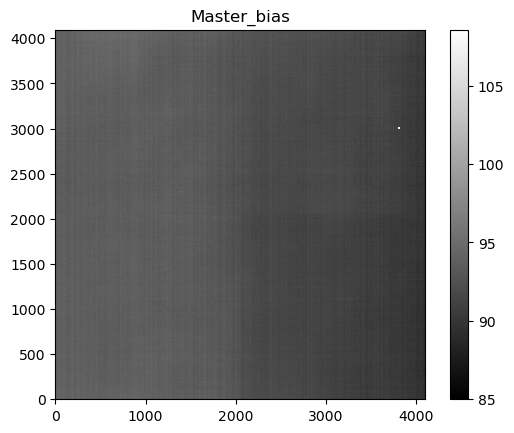

In [70]:
plt.imshow(master_bias, cmap='gray', vmin=85, vmax=np.mean(master_bias)+np.std(master_bias), origin= 'lower')
plt.title('Master_bias')
plt.colorbar()
plt.show()
#plt.savefig('Master_bias')

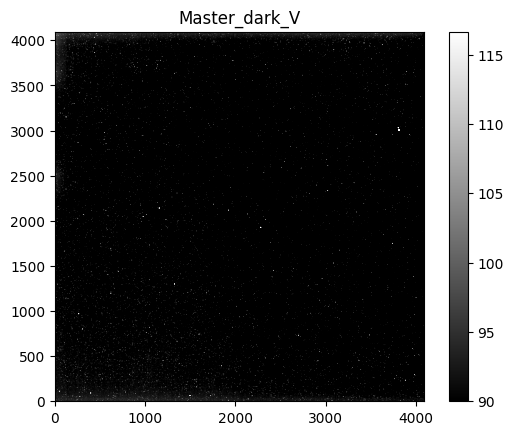

<Figure size 640x480 with 0 Axes>

In [5]:
plt.imshow(masterV_dark, cmap='gray', vmin=90, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master_dark_V')
plt.colorbar()
plt.show()
plt.savefig('Master_dark_V normalizado')

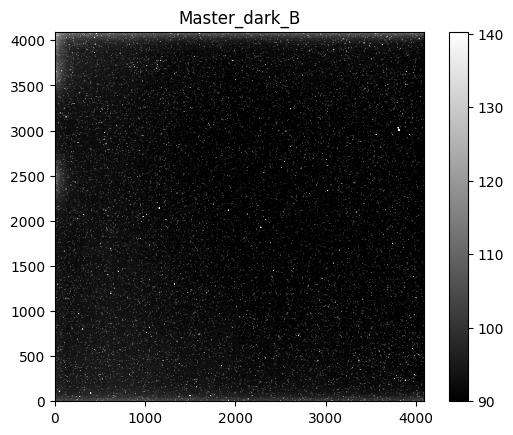

<Figure size 640x480 with 0 Axes>

In [6]:
plt.imshow(masterB_dark, cmap='gray', vmin=90, vmax=np.mean(masterB_dark)+np.std(masterB_dark), origin= 'lower')
plt.title('Master_dark_B')
plt.colorbar()
plt.show()
plt.savefig('Master_dark_B normalizado')

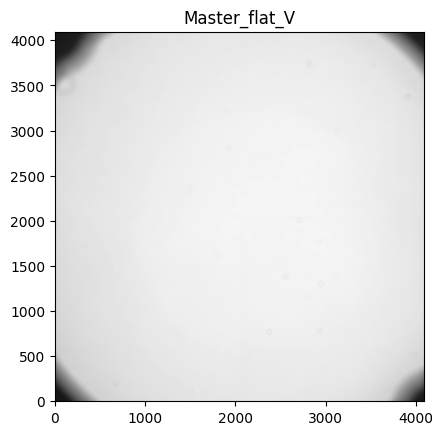

<Figure size 640x480 with 0 Axes>

In [7]:
plt.imshow(master_flatV, cmap='gray', vmin=0, vmax=np.mean(master_flatV)+np.std(master_flatV), origin='lower')
plt.title('Master_flat_V')
plt.show()
plt.savefig('Master_flat_V normalizado')

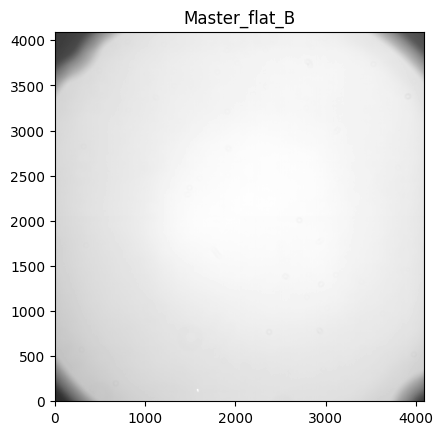

<Figure size 640x480 with 0 Axes>

In [8]:
plt.imshow(master_flatB, cmap='gray', vmin=0, vmax=np.mean(master_flatB)+np.std(master_flatB), origin='lower')
plt.title('Master_flat_B')
plt.show()
plt.savefig('Master_flat_B normalizado')

In [71]:
#Abrimos las imágenes de la nebulosa
B1= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001338.fit')
B1d= B1[0].data
    
B2= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001339.fit')
B2d= B2[0].data

B3= astropy.io.fits.open('Light_NGC_6523_B_250.000secs_00001340.fit')
B3d= B3[0].data

V1= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001334.fit')
V1d= V1[0].data

V2= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001335.fit')
V2d= V2[0].data
    
V3= astropy.io.fits.open('Light_NGC_6523_V_100.000secs_00001336.fit')
V3d= V3[0].data

In [72]:
BR1=(B1d-masterB_dark)/(master_flatB)

BR2=(B2d-masterB_dark)/(master_flatB)

BR3=(B3d-masterB_dark)/(master_flatB)

VR1 = (V1d - masterV_dark)/(master_flatV)

VR2 = (V2d - masterV_dark)/(master_flatV)

VR3 = (V3d - masterV_dark)/(master_flatV)

In [73]:
B = np.median(np.array([BR1,BR2,BR3]),axis=0)
V = np.median(np.array([VR1,VR2,VR3]),axis=0)

B[B < 0] = 0
V[V <0] = 0

B_raw = np.median(np.array([B1[0].data, B2[0].data, B3[0].data]), axis=0)
V_raw = np.median(np.array([V1[0].data, V2[0].data, V3[0].data]), axis=0)

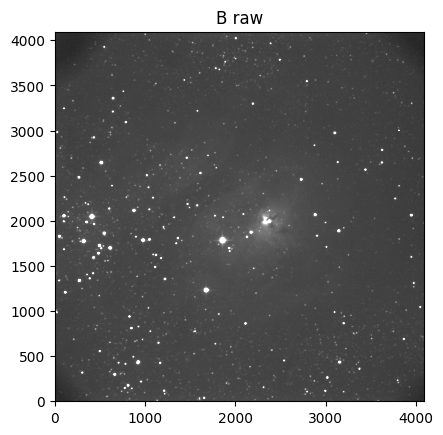

In [12]:
plt.imshow(B_raw, cmap='gray', vmin=0, vmax= np.mean(B_raw)+ np.std(B_raw), origin='lower')
plt.title('B raw')
plt.show()
#plt.savefig('B raw')
plt.close()

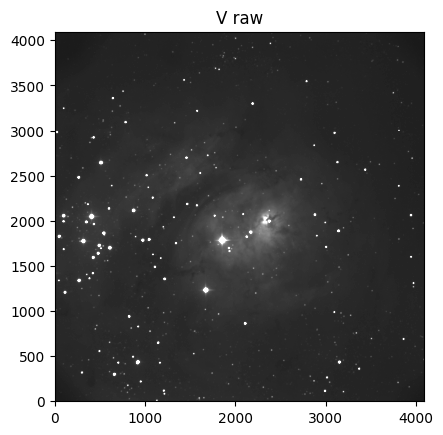

In [13]:
plt.imshow(V_raw, cmap='gray', vmin=0, vmax= np.mean(V_raw)+ np.std(V_raw), origin='lower')
plt.title('V raw')
plt.show()
#plt.savefig('V raw')
plt.close()

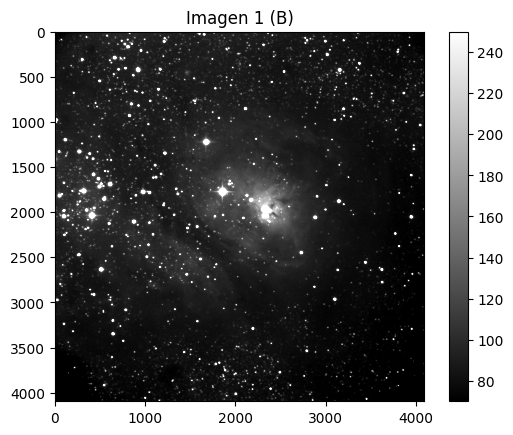

In [14]:
plt.imshow(B,cmap='gray',vmin=70, vmax=250)
plt.title('Imagen 1 (B)') 
plt.colorbar()
#plt.savefig('BR1')
plt.show()

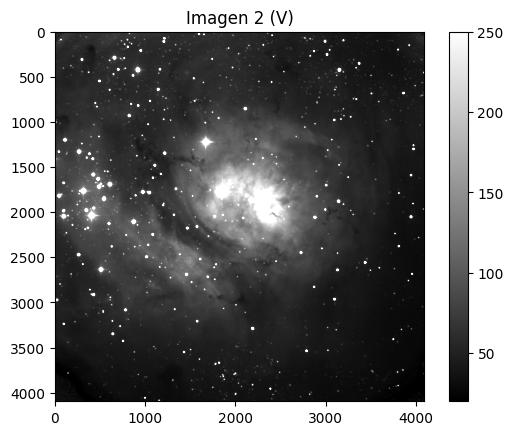

In [15]:
plt.imshow(V,cmap='gray',vmin=20, vmax=250)
plt.title('Imagen 2 (V)')
plt.colorbar()
#plt.savefig('VR1')
plt.show()

# Estrellas

Estrella HIP_117445

In [10]:
#Darks estrella 2

darkHIP2_1V= astropy.io.fits.open('Dark_2.500secs_00001462.fit')
darkHIP2_2V= astropy.io.fits.open('Dark_2.500secs_00001463.fit')
darkHIP2_3V= astropy.io.fits.open('Dark_2.500secs_00001464.fit')
darkHIP2_4V= astropy.io.fits.open('Dark_2.500secs_00001465.fit')
darkHIP2_5V= astropy.io.fits.open('Dark_2.500secs_00001466.fit')

darkHIP2_1B = astropy.io.fits.open('Dark_9.000secs_00001452.fit')
darkHIP2_2B = astropy.io.fits.open('Dark_9.000secs_00001453.fit')
darkHIP2_3B = astropy.io.fits.open('Dark_9.000secs_00001454.fit')
darkHIP2_4B = astropy.io.fits.open('Dark_9.000secs_00001455.fit')
darkHIP2_5B = astropy.io.fits.open('Dark_9.000secs_00001456.fit')

In [11]:
#DARK V
darkHIP2_Vlist= np.array([darkHIP2_1V[0].data, darkHIP2_2V[0].data, darkHIP2_3V[0].data, darkHIP2_4V[0].data, darkHIP2_5V[0].data])

#DARK B
darkHIP2_Blist= np.array([darkHIP2_2B[0].data, darkHIP2_2B[0].data, darkHIP2_3B[0].data, darkHIP2_4B[0].data, darkHIP2_5B[0].data])

#Master DARK V
masterV_darkHIP2 = np.median(darkHIP2_Vlist, axis = 0)

#Master DARK B
masterB_darkHIP2 = np.median(darkHIP2_Blist, axis = 0)

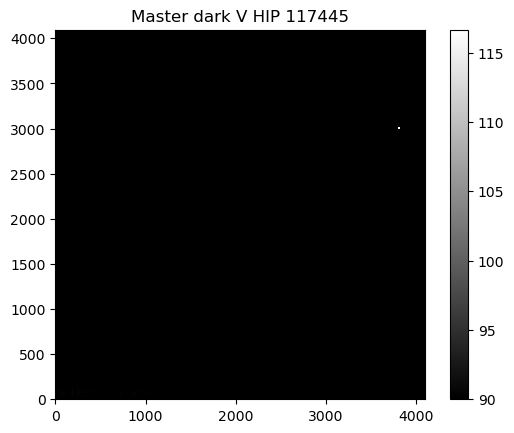

In [12]:
plt.imshow(masterV_darkHIP2, cmap='gray', vmin=90, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master dark V HIP 117445')
plt.colorbar()
plt.show()

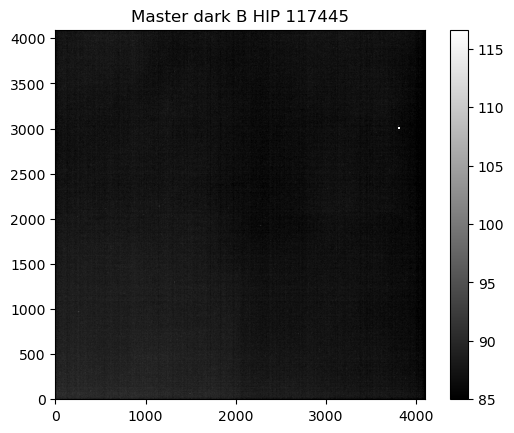

In [13]:
plt.imshow(masterB_darkHIP2, cmap='gray', vmin=85, vmax=np.mean(masterV_dark)+np.std(masterV_dark), origin= 'lower')
plt.title('Master dark B HIP 117445')
plt.colorbar()
plt.show()

In [17]:
B1E2= astropy.io.fits.open('Light_HIP_117445_B_9.000secs_00001408.fit')
B1E2d= B1E2[0].data

B2E2= astropy.io.fits.open('Light_HIP_117445_B_9.000secs_00001409.fit')
B2E2d= B2E2[0].data

B3E2= astropy.io.fits.open('Light_HIP_117445_B_9.000secs_00001410.fit')
B3E2d= B3E2[0].data

V1E2= astropy.io.fits.open('Light_HIP_117445_V_2.500secs_00001405.fit')
V1E2d= V1E2[0].data

V2E2= astropy.io.fits.open('Light_HIP_117445_V_2.500secs_00001406.fit')
V2E2d= V2E2[0].data

V3E2= astropy.io.fits.open('Light_HIP_117445_V_2.500secs_00001407.fit')
V3E2d= V3E2[0].data

In [18]:
BR1_E2=(B1E2d-masterB_darkHIP2)/(master_flatB)

BR2_E2=(B2E2d-masterB_darkHIP2)/(master_flatB)

BR3_E2=(B3E2d-masterB_darkHIP2)/(master_flatB)

VR1_E2 = (V1E2d - masterV_darkHIP2)/(master_flatV)

VR2_E2 = (V2E2d - masterV_darkHIP2)/(master_flatV)

VR3_E2 = (V3E2d - masterV_darkHIP2)/(master_flatV)

In [19]:
#Array foto arreglada
BE2 = np.median(np.array([BR1_E2,BR2_E2,BR3_E2]),axis=0)
VE2 = np.median(np.array([VR1_E2,VR2_E2,VR3_E2]),axis=0)

BE2[BE2 < 0] = 0
VE2[VE2 <0] = 0

#Array foto raw
B_E2raw = np.median(np.array([B1E2[0].data, B2E2[0].data, B3E2[0].data]), axis=0)
V_E2raw = np.median(np.array([V1E2[0].data, V2E2[0].data, V3E2[0].data]), axis=0)

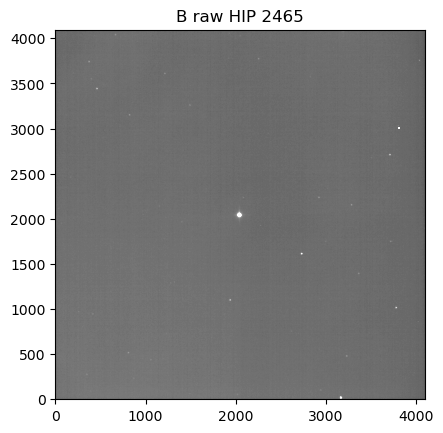

In [20]:
plt.imshow(B_E2raw, cmap='gray', vmin=60, vmax= np.mean(B_E2raw)+ np.std(B_E2raw), origin='lower')
plt.title('B raw HIP 2465')
plt.show()
#plt.savefig('B raw')
plt.close()

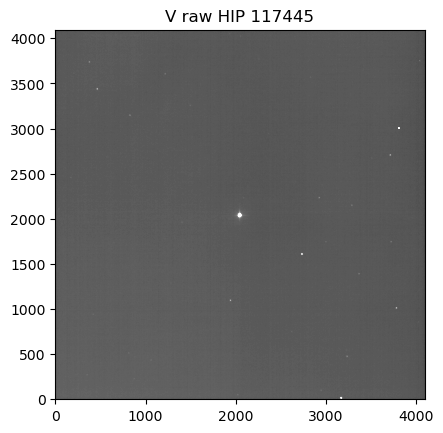

In [21]:
plt.imshow(V_E2raw, cmap='gray', vmin=60, vmax= np.mean(V_E2raw)+ np.std(V_E2raw), origin='lower')
plt.title('V raw HIP 117445')
plt.show()
#plt.savefig('V raw')
plt.close()

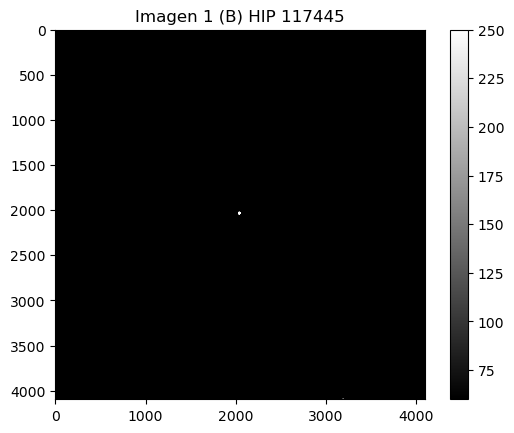

In [35]:
plt.imshow(BE2,cmap='gray',vmin=60, vmax=250)
plt.title('Imagen 1 (B) HIP 117445') 
plt.colorbar()
#plt.savefig('BR2')
plt.show()

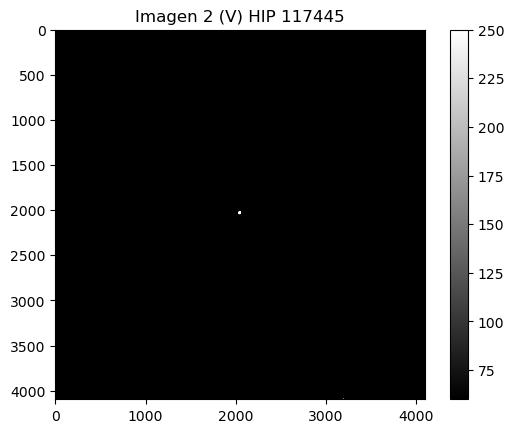

In [36]:
plt.imshow(VE2,cmap='gray',vmin=60, vmax=250)
plt.title('Imagen 2 (V) HIP 117445') 
plt.colorbar()
#plt.savefig('VR1E2')
plt.show()

# Calibración

In [37]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

## Estrella HIP 2465

### Filtro B

In [38]:
dataE2= BE2
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(dataE2, nsigma=5)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(dataE2, threshold, npixels=50)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 21
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

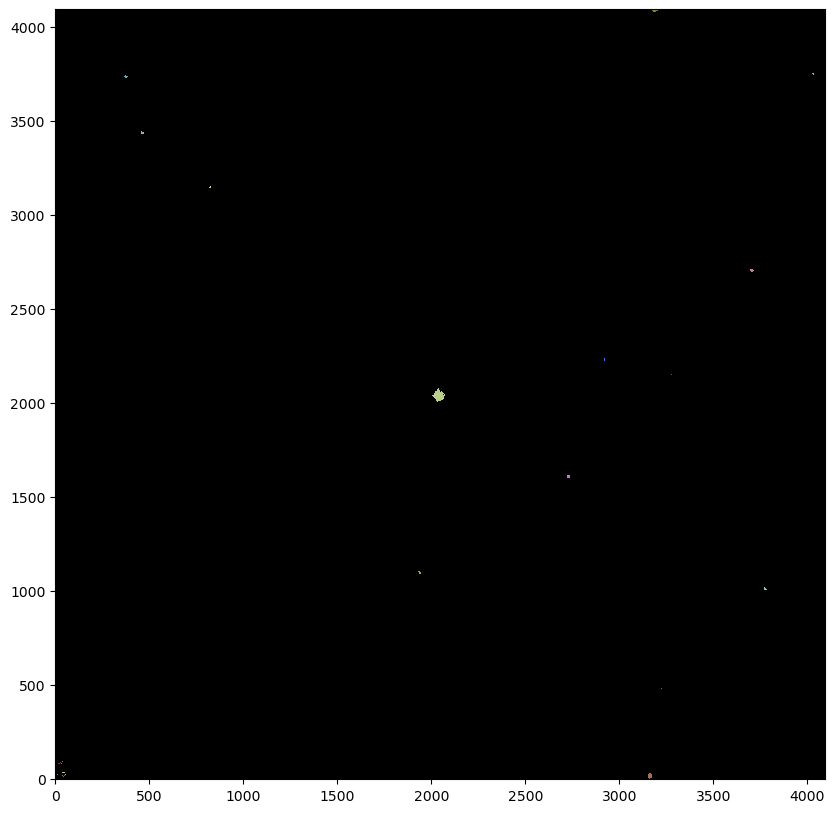

In [44]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sourE2 = sour.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour, origin='lower', cmap=cmap_sourE2, interpolation='nearest')
plt.show()

In [50]:
#Obtenemos el catálogo
cat = SourceCatalog(dataE2, sour)
#Lo pasamos a tabla y lo mostramos
tblE2 = cat.to_table()
tblE2

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int64,float64,float64,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,3165.582717498377,15.692612028596878,None,3152,3179,2,30,496.0,5.019455869162776,4.638282747091622,-45.11611189642961,0.3822453561847918,14.660799797611087,361.20221450919047,0.0,42468.89084153695,nan,46844.58930083981,nan
2,46.3841279764847,16.400049034879757,None,39,55,12,23,54.0,4.727202871447694,2.4030944053999224,10.292975828156385,0.8611479538425352,15.408857244150317,159.13803624824556,0.0,1846.591943811926,nan,26574.16544535385,nan
3,11.724871980977364,18.599283638267423,None,1,21,14,23,67.0,4.865514399747864,2.475574717766337,-1.2471891685291197,0.8608846337926681,16.040072579653092,130.11325932393663,0.0,2028.465046072441,nan,17012.097192299778,nan
4,49.82081461540532,32.218561632171344,None,39,62,23,38,63.0,6.654247804043591,2.3598801814469046,-28.43475319113719,0.9350019141439301,14.998533387013284,96.74057695123737,0.0,1777.30947242,nan,42198.284104054634,nan
5,14.169354202666607,39.47965862316004,None,7,22,34,46,58.0,4.522851122539944,2.7584243750279787,-44.97475282978098,0.792489023594008,15.835529511780422,95.06801956435885,0.0,1859.8820835339413,nan,21984.72681049128,nan
6,18.026856214972725,80.07751646550408,None,8,29,74,87,63.0,5.596965094351259,2.284885526461304,24.81214195919154,0.9128761950905131,14.571129239537353,76.81055049924892,0.0,1739.6619256916715,nan,20222.824933331278,nan
7,38.67010645845663,83.87914004320332,None,29,48,75,94,89.0,5.963592908376136,3.569906104616266,59.567175418861886,0.8010356341025937,13.980940892641737,94.28036876355748,0.0,2410.3177748633957,nan,51131.798425697314,nan
8,9.765911199214948,90.66378662743027,None,1,18,82,97,56.0,4.405857660390791,3.141533228843573,-30.252654946743462,0.7011278597456528,14.757066462948815,55.63619701509905,0.0,1567.3041186734586,nan,20157.515825311424,nan


In [51]:
tablaE2 = tblE2['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tablaE2

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int64,float64,float64,float64,float64
1,3165.582717498377,15.692612028596878,496.0,42468.89084153695
2,46.3841279764847,16.400049034879757,54.0,1846.591943811926
3,11.724871980977364,18.599283638267423,67.0,2028.465046072441
4,49.82081461540532,32.218561632171344,63.0,1777.30947242
5,14.169354202666607,39.47965862316004,58.0,1859.8820835339413
6,18.026856214972725,80.07751646550408,63.0,1739.6619256916715
7,38.67010645845663,83.87914004320332,89.0,2410.3177748633957
8,9.765911199214948,90.66378662743027,56.0,1567.3041186734586


In [52]:
#Dividimos el "flujo" por el tiempo de exposición (para obtener de verdad el flujo xd)
tablaE2['segment_flux'] = tablaE2['segment_flux']/60
tablaE2

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int64,float64,float64,float64,float64
1,3165.582717498377,15.692612028596878,496.0,707.8148473589492
2,46.3841279764847,16.400049034879757,54.0,30.776532396865434
3,11.724871980977364,18.599283638267423,67.0,33.80775076787402
4,49.82081461540532,32.218561632171344,63.0,29.621824540333332
5,14.169354202666607,39.47965862316004,58.0,30.998034725565688
6,18.026856214972725,80.07751646550408,63.0,28.994365428194524
7,38.67010645845663,83.87914004320332,89.0,40.17196291438993
8,9.765911199214948,90.66378662743027,56.0,26.12173531122431


In [53]:
#Buscamos la fuente que es la estrella (mayor área)
estrella_index = np.argmax(tablaE2['area'])
#Obtenemos su flujo
flux_estrella = tablaE2['segment_flux'][estrella_index]
#Calculamos la magnitud medida
mag_1 = -2.5*np.log(flux_estrella)
#Obtenemos el zeropoint
zeropointE2_B = 7 - mag_1
#Usamos el zeropoint para obtener la magnitud calibrada
tablaE2['magnitude'] = zeropointE2_B - 2.5*np.log(tablaE2['segment_flux'])
tablaE2

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int64,float64,float64,float64,float64,float64
1,3165.582717498377,15.692612028596878,496.0,707.8148473589492,16.53116966637187
2,46.3841279764847,16.400049034879757,54.0,30.776532396865434,24.369744866547563
3,11.724871980977364,18.599283638267423,67.0,33.80775076787402,24.134900805379697
4,49.82081461540532,32.218561632171344,63.0,29.621824540333332,24.46534751453369
5,14.169354202666607,39.47965862316004,58.0,30.998034725565688,24.35181651121418
6,18.026856214972725,80.07751646550408,63.0,28.994365428194524,24.518872238706436
7,38.67010645845663,83.87914004320332,89.0,40.17196291438993,23.703702746629173
8,9.765911199214948,90.66378662743027,56.0,26.12173531122431,24.77970668174769


In [90]:
zeropointE2_B

32.93662602752929

### Filtro V

In [58]:
dataE2V = VE2
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(dataE2V, nsigma=6)
#Utilizamos el umbral y la imagen para detectar fuentes
sourV = detect_sources(dataE2V, threshold, npixels=300)
#Mostramos el número de fuentes detectadas
sourV

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 18
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

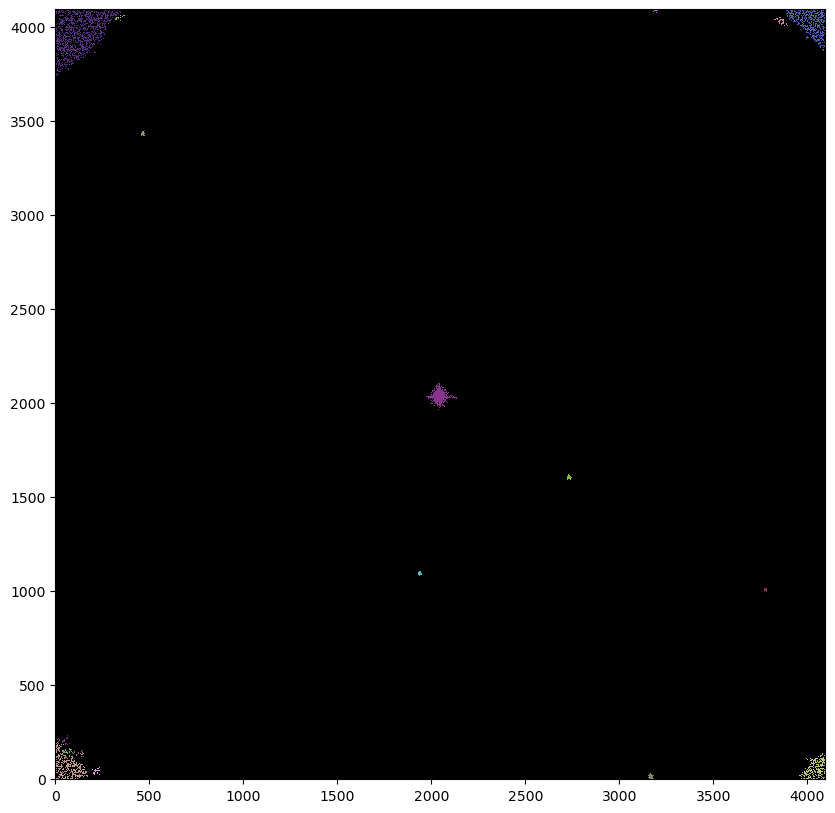

In [59]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sourE2_V = sourV.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourV, origin='lower', cmap=cmap_sourE2_V, interpolation='nearest')
plt.show()

In [61]:
#Obtenemos el catálogo
cat = SourceCatalog(dataE2V, sour)
#Lo pasamos a tabla y lo mostramos
tblE2 = cat.to_table()
tblE2

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int64,float64,float64,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,3168.333901604127,12.707302538571762,None,3152,3179,2,30,496.0,4.304784439942326,3.89882509283544,-73.88763683976326,0.4239282457601194,0.0,576.024792953397,0.0,37577.725669509426,nan,41601.31441875252,nan
2,46.588704387181785,17.25665737061337,None,39,55,12,23,54.0,4.859063454536992,2.669870311693707,7.719143504101447,0.8355187632666589,0.0,118.6327336817795,0.0,1079.0611383739665,nan,65278.32648307111,nan
3,13.266809964417252,18.546333699310082,None,1,21,14,23,67.0,4.622264963251509,2.55837056634231,14.672770488896846,0.8328568092691714,0.0,110.73510140405615,0.0,899.5708373240233,nan,37865.97553457966,nan
4,50.969754427118744,31.025354292983746,None,39,62,23,38,63.0,6.2155672825201345,2.7253479669528295,-34.70881331013573,0.8987451835299556,0.0,74.66764847319068,0.0,766.960091545548,nan,88427.87790451339,nan
5,13.951396133460287,40.527981642965855,None,7,22,34,46,58.0,4.594622133507114,2.2999783662781774,-43.442018615461976,0.8656899771697038,0.0,130.77663821163176,0.0,1382.5811387944166,nan,39299.89306288514,nan
6,16.469040829462593,78.9933386036234,None,8,29,74,87,63.0,4.982877246439519,2.080944413643343,29.605982103567836,0.9086222191703744,0.0,126.9788908765653,0.0,1092.3217336710643,nan,34480.786793779414,nan
7,39.10650716046218,84.3564368487965,None,29,48,75,94,89.0,7.044917140560309,3.267817331051855,54.12156596058,0.8859113362710828,0.0,128.99178036233505,0.0,1579.0520220278156,nan,98142.99295586994,nan
8,9.609438792749046,90.99899894325097,None,1,18,82,97,56.0,4.154052647489351,2.4042911185012303,-40.987219682990535,0.8154822716815007,0.0,116.65469431661985,0.0,911.8180776427256,nan,30631.9963593078,nan


# Catálogo 

In [62]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [87]:
data = B

#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(data, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(data, threshold, npixels=10)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 10531
labels: [    1     2     3     4     5 ... 10527 10528 10529 10530 10531]

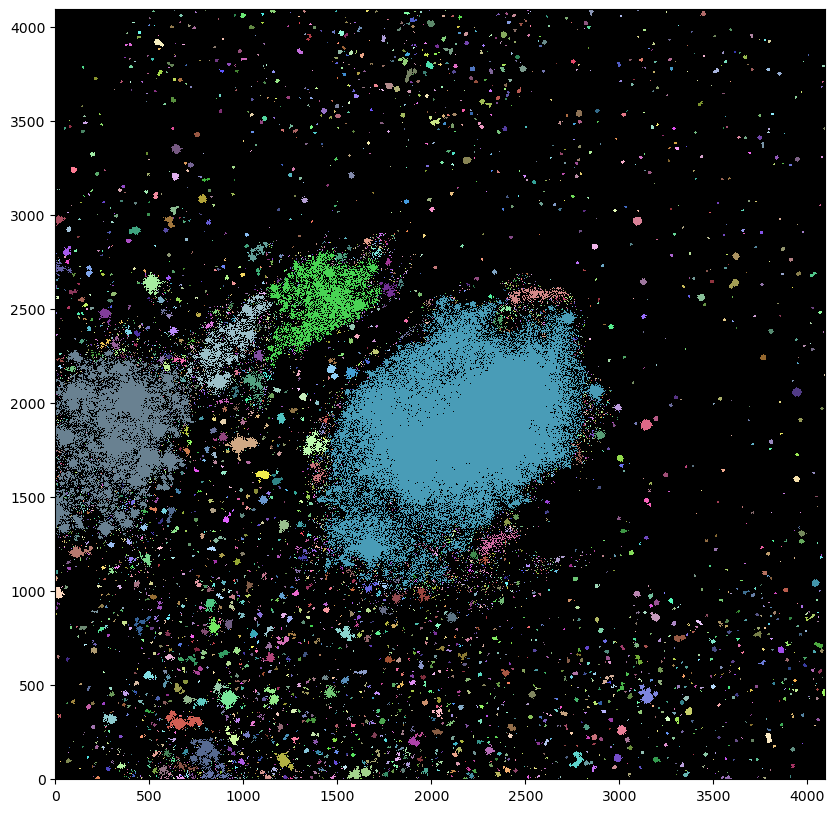

In [89]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour = sour.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour, origin='lower', cmap=cmap_sour, interpolation='nearest')
plt.show()

In [97]:
#Usamos la función mencionada para separar las fuentes
sour_deblend = deblend_sources(data, sour, npixels=10, nlevels=1 ,contrast=0)
#Mostramos el número de fuentes detectadas
sour_deblend 

Deblending:   0%|          | 0/4864 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 10622
labels: [    1     2     3     4     5 ... 10618 10619 10620 10621 10622]

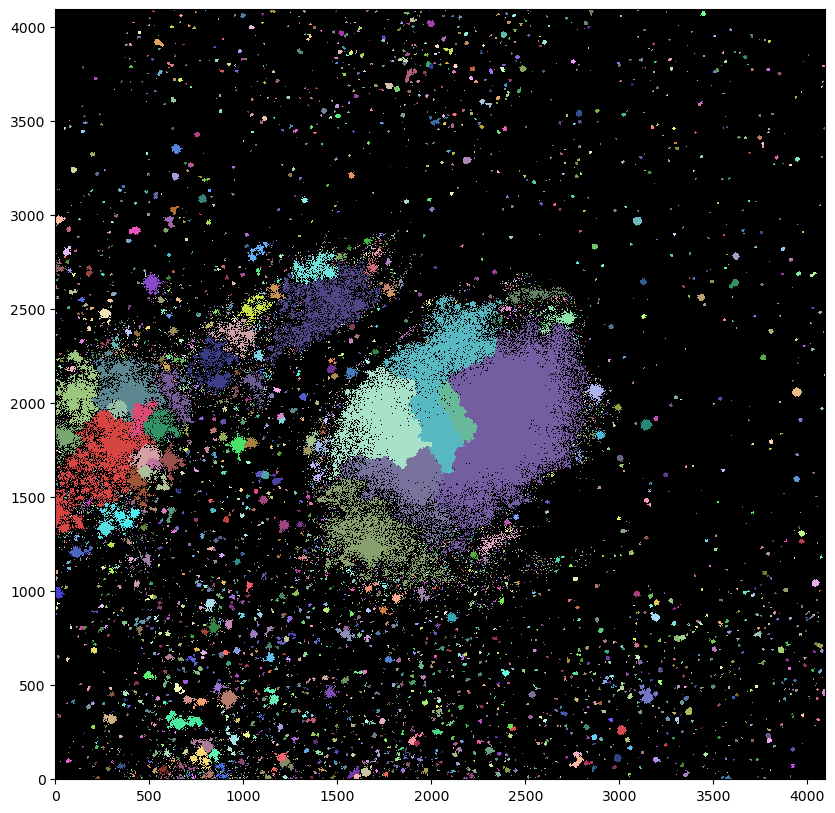

In [98]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap=cmap_deblend,interpolation='nearest')
plt.show()

In [99]:
#Obtenemos el catálogo
cat = SourceCatalog(data, sour_deblend)
#Lo pasamos a tabla y lo mostramos
tbl = cat.to_table()
tbl

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int64,float64,float64,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,None,212,239,0,17,301.0,6.153561415092118,3.9923355619465615,-2.3336052938141627,0.7609721480685386,101.88236861031938,773.156641370307,0.0,43598.069224991894,nan,331536.18293532624,nan
2,277.23738448633287,1.1273669448202988,None,271,283,0,5,25.0,3.2638240617365417,1.281340054019558,-5.142990468402853,0.919714198429502,103.33384845819165,147.05517517288678,0.0,2848.0356319810357,nan,55606.86484037084,nan
3,393.5670837270501,1.0894194971588487,None,390,397,0,2,13.0,2.0871024783287986,0.7848177899709256,7.893278584763544,0.9266065860515089,101.50067267419722,127.53129005059021,0.0,1417.343131978438,nan,23335.359320162635,nan
4,458.9393446041314,3.087594773309202,None,455,462,0,8,23.0,2.4714655206569156,1.8717524532190402,48.821107747509124,0.6530147829565764,101.74702137959437,491.7533574600321,0.0,2865.9088123396177,nan,59321.078537681955,nan
5,543.7830169677574,2.409318116390217,None,539,549,0,5,19.0,3.1313106409706277,1.1761122205694503,-9.178393775766686,0.9267829156102796,101.49664139124701,126.52442870311968,0.0,2067.6163645256947,nan,49281.58968783585,nan
6,591.2791958654641,13.920859064215215,None,553,621,0,35,601.0,19.021839467087364,7.051718916454483,19.219309852044436,0.9287458852499866,101.48347903996525,297.60294544142715,0.0,67422.44734899836,nan,1456325.1290998296,nan
7,627.5338091227153,4.5233361874537374,None,620,635,0,11,47.0,4.239780877304602,2.7008131664329915,12.303035937085237,0.7708496221598572,101.72927946408753,118.66136629341045,0.0,5091.202543877787,nan,128410.9969151968,nan
8,664.9572332482599,7.92121109347383,None,639,689,0,29,463.0,12.152399431066598,6.396663910146888,10.586983840105754,0.8502553460197426,101.4828773097516,167.73082489146162,0.0,52500.361196304046,nan,855691.2620256518,nan


In [100]:
tabla = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int64,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,301.0,43598.069224991894
2,277.23738448633287,1.1273669448202988,25.0,2848.0356319810357
3,393.5670837270501,1.0894194971588487,13.0,1417.343131978438
4,458.9393446041314,3.087594773309202,23.0,2865.9088123396177
5,543.7830169677574,2.409318116390217,19.0,2067.6163645256947
6,591.2791958654641,13.920859064215215,601.0,67422.44734899836
7,627.5338091227153,4.5233361874537374,47.0,5091.202543877787
8,664.9572332482599,7.92121109347383,463.0,52500.361196304046


In [101]:
#Dividimos el "flujo" por el tiempo de exposición
tabla['segment_flux'] = tabla['segment_flux']/250
tabla


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int64,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,301.0,174.39227689996758
2,277.23738448633287,1.1273669448202988,25.0,11.392142527924143
3,393.5670837270501,1.0894194971588487,13.0,5.669372527913752
4,458.9393446041314,3.087594773309202,23.0,11.463635249358472
5,543.7830169677574,2.409318116390217,19.0,8.270465458102779
6,591.2791958654641,13.920859064215215,601.0,269.68978939599344
7,627.5338091227153,4.5233361874537374,47.0,20.36481017551115
8,664.9572332482599,7.92121109347383,463.0,210.0014447852162


### ZERO POINT ESTRELLA HIP 117445

In [109]:
#Calculamos las magnitudes aparentes usando el zeropoint
zeropointB1E2 = 32.93662602752929
tabla['magnitude'] = zeropointB1E2 - 2.5*np.log(tabla['segment_flux'])
tabla

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int64,float64,float64,float64,float64,float64
1,226.49308394331092,6.451300095205023,301.0,174.39227689996758,20.033357960869644
2,277.23738448633287,1.1273669448202988,25.0,11.392142527924143,26.854316362977663
3,393.5670837270501,1.0894194971588487,13.0,5.669372527913752,28.59892991166713
4,458.9393446041314,3.087594773309202,23.0,11.463635249358472,26.838676345100758
5,543.7830169677574,2.409318116390217,19.0,8.270465458102779,27.654899052097292
6,591.2791958654641,13.920859064215215,601.0,269.68978939599344,18.943445101750676
7,627.5338091227153,4.5233361874537374,47.0,20.36481017551115,25.40210497767223
8,664.9572332482599,7.92121109347383,463.0,210.0014447852162,19.568840000970784


In [105]:
#Mostramos las magnitudes
np.sort(tabla['magnitude'])

1.5563791622553644
2.323400627605043
3.6938247071305526
3.9472444392916692
4.223846630563294
4.430336754253968
5.591139774943677
6.080522184037395
6.748343451592554
7.5676881497761705
7.638889949184005


In [108]:
#Finalmente obtenemos una imagen rgb a color
#rgb= make_lupton_rgb(Si,Sr,Sg,stretch=130, Q=5)
#plt.imshow(rgb[1800:2300, 1800:2300], origin='lower')
#plt.colorbar()
#plt.savefig('rgb3.png',dpi='figure')
#plt.close()









